In [143]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os


In [144]:
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to C:\Users\Vibhor
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [145]:
apps_df=pd.read_csv('c:/Users/Vibhor Rajput/Documents/python project/Play Store Data.csv')
reviews_df=pd.read_csv('c:/Users/Vibhor Rajput/Documents/python project/User Reviews.csv')

In [146]:
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [147]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [148]:
#pd.read_csv():CSV FILES
#pd.read_excel(): EXCEL FILES
#pd.read_sql(): SQl DATABASES
#pd.read_json() : JSON FILES

In [149]:
#df.isnull () : Missing values
#df.drona() : remove the rows and columns,that contain the missing value
 #df.fillno() :Fills missing values

In [150]:
#step 2 : Data Cleaning
apps_df = apps_df.dropna(subset=['Rating'])
for column in apps_df.columns :
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
    apps_df.drop_duplicates(inplace=True)
    apps_df=apps_df=apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset=['Translated_Review'],inplace=True)

C:\Users\Vibhor Rajput\AppData\Local\Temp\ipykernel_12660\4170625066.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [151]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [152]:
#converting the installs columns to numeric by removing commos and +
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)
                                                                        
#Converting price column to numeric after removing$
apps_df['price']=apps_df['Price'].str.replace('$','').astype(float)
                                                                     

In [153]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [154]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
price             float64
dtype: object

In [155]:
merged_df=pd.merge(apps_df,reviews_df,on='App',how ='inner')

In [156]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I hate,Negative,-0.800,0.900000


In [157]:
#Data Tranmission
def convert_size(size):
    if'M'in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float (size.replace('k',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)

In [158]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [159]:
#Lograrthmic
apps_df['log_Installs']=np.log(apps_df['Installs'])
#apps_df['log_reviews']=np.log(apps_df['Reviews'])

In [160]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

In [161]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price,log_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,11.512925


In [162]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
price             float64
log_Installs      float64
dtype: object

In [163]:
def rating_group(rating):
    if rating >=4:
        return 'Top Rated app'
    elif rating >=3:
        return 'Above Average'
    elif rating >=2:
        return 'Average'
    else:
        return 'Below Average'
        apps_df['Rating_Group']=apps_df['Rating'].apply(rating_group)
        apps_df['Revenue'] = apps_df['Price'].values * apps_df['Installs'].values

In [164]:
#polarity scores in SIA
#Postive, Nagative, Neutral and Compound

In [165]:
#sentimental Analyer
sia = SentimentIntensityAnalyzer()

In [166]:
#sentimental Analyer
sia = SentimentIntensityAnalyzer()
review = "This app is worst! I hate these new features."
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.8439}


In [167]:
review = "This app is amazing! I love the new features."
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [168]:
review = "This app is okay."
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}


In [169]:
reviews_df['Sentiment_Score']= reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [170]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [171]:
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')
apps_df['Year'] = apps_df['Last Updated'].dt.year


In [172]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price,log_Installs,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,9.210340,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,13.122363,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,15.424948,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0,17.727534,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0,11.512925,2018


In [173]:
html_files_path="./"    # Ensure variable name is consistent
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [174]:
plot_containers=""

# Save each plotly figure to an HTML file 
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html= False, include_plotlyjs='inline')
    #Apppend The Plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id ="{filename}"onclick="openPlot('{filename}')">
    <div class ="plot">{html_content}</div>
    <div class="insights">{insight}</div> 
    </div>
    """
    fig.write_html(filepath,full_html=False, include_pltolyjs ='inline')

In [175]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_font='white'
title_font= {'size':16}
axis_font ={'size':12}

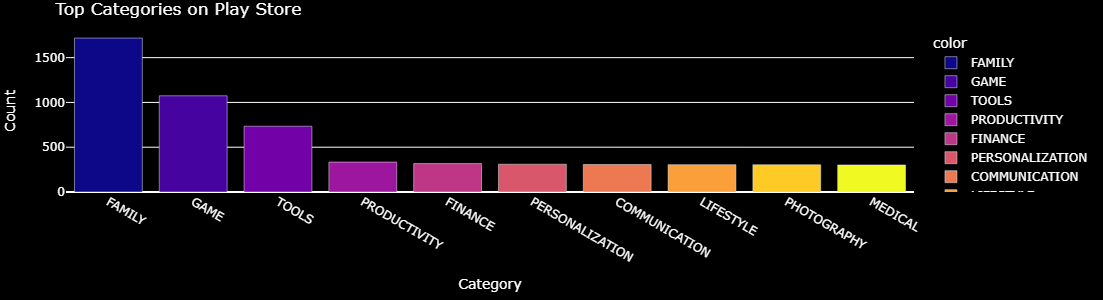

In [177]:
#figure 1

category_counts = apps_df['Category'].value_counts().nlargest(10)

fig1 = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x': 'Category', 'y': 'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,  
    width=400,
    height=300,
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))

            
fig1.show()    

In [178]:
plot_containers = ""  # Initialize the global variable

def save_plot_as_html(fig, filename, insight):
    global plot_containers  # Ensure we modify the global variable
    
    filepath = f"./{filename}"
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')  # ✅ Fixed typo

    # Append the plot and insight to the container
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div> 
    </div>
    """
 

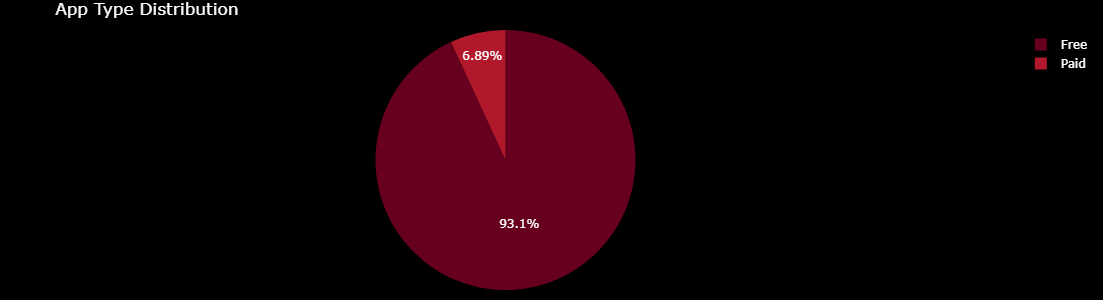

In [179]:
#figure 2
#type Analysis
type_counts=apps_df['Type'].value_counts()
fig2 = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,  
    width=400,
    height=300,
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)
#fig2
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")
fig2.show()

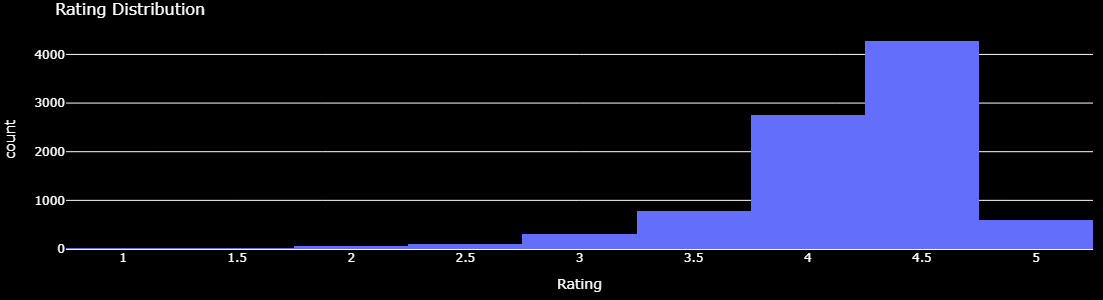

In [180]:
#Figure 3
fig3=px.histogram(
    apps_df,
    x='Rating',
    nbins=20,    #nbins means what is total no of graph which i need
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],  #{#636EFA} exploring more ways to code for color
    width=400,
    height=300,
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font={'size':16},
    
    margin=dict(l=10, r=10, t=30, b=10)
)
#fig3
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")
fig3.show()


In [181]:
#figure 4
print(reviews_df.columns)


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Sentiment_Score'],
      dtype='object')


In [182]:
#figure 4
sentiment_counts = reviews_df['Sentiment'].value_counts()


In [183]:
#figure 4
reviews_df.columns = reviews_df.columns.str.strip().str.lower()
print(reviews_df.columns)


Index(['app', 'translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity', 'sentiment_score'],
      dtype='object')


In [184]:
#figure 4
print(reviews_df.head())


                     app                                  translated_review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  sentiment  sentiment_polarity  sentiment_subjectivity  sentiment_score  
0  Positive                1.00                0.533333           0.9531  
1  Positive                0.25                0.288462           0.6597  
3  Positive                0.40                0.875000           0.6249  
4  Positive                1.00                0.300000           0.6369  
5  Positive                1.00                0.300000           0.6369  


In [185]:
#figure 4
if 'sentiment_score' in reviews_df.columns:
    sentiment_counts = reviews_df['sentiment_score'].value_counts()
else:
    print("❌ Column 'sentiment_score' does not exist. Available columns:", reviews_df.columns)


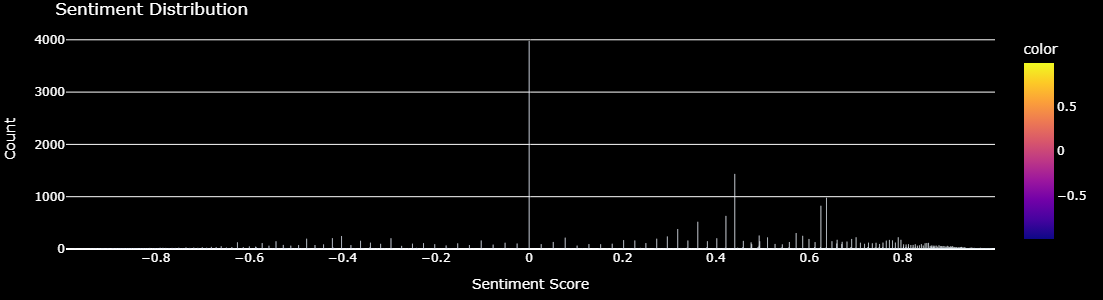

In [186]:
#figure 4
sentiment_score = reviews_df['sentiment_score'].value_counts()

fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Score', 'y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,  
    width=400,
    height=300,
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)

save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

fig4.show()

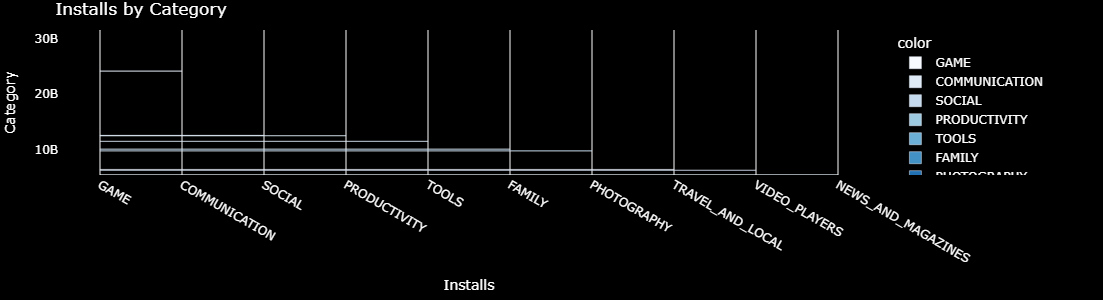

In [187]:
#figure 5
installs_by_category = apps_df.groupby('Category')['Installs'].sum().nlargest(10)

fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x': 'Installs', 'y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,  
    width=400,
    height=300,
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)

save_plot_as_html(fig5,"Installs Graph 5.html","The category with the most installs are social and communication apps, reflecting their broad appeal and daily usage") 

fig5.show()

In [188]:
#figure 6
#update per year graph
updates_per_year = apps_df['Last Updated'].dt.year.value_counts().sort_index()

fig6=px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y':'Number of Updates'},
    title='Number fo Updates Over the Years',
    color_discrete_sequence=['#AB63F4'],  
    width=plot_width,
    height=plot_height,
)
fig6.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)

save_plot_as_html(fig6,"Installs Graph 6.html"," Updates have been increasing over the years, showing that developer are actively maintaining and improving their apps.") 
fig6.show()

In [189]:
print(apps_df.columns)



Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'price', 'log_Installs', 'Year'],
      dtype='object')


In [190]:
apps_df.columns = apps_df.columns.str.strip()


In [191]:
print(apps_df.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159  19.0     10000  Free     0       Everyone   
1      967  14.0    500000  Free     0       Everyone   
2    87510   8.7   5000000  Free     0       Everyone   
3   215644  25.0  50000000  Free     0           Teen   
4      967   2.8    100000  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pr

In [192]:
apps_df = pd.read_csv('c:/Users/Vibhor Rajput/Documents/python project/Play Store Data.csv')
print(apps_df.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [193]:
print(apps_df.columns.tolist())


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [194]:
apps_df.columns = apps_df.columns.str.strip()
print(apps_df.columns.tolist())  # Check again


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [195]:
print(apps_df.isna().sum())  # Count missing values


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [196]:
if 'Revenue' in apps_df.columns:
    revenue_by_category = apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
else:
    print("Column 'Revenue' is missing!")



Column 'Revenue' is missing!


In [197]:
import pandas as pd
import numpy as np

# Sample DataFrame (if not already created)
# Replace this with your actual DataFrame
apps_df = pd.DataFrame({
    'Category': ['Game', 'Productivity', 'Social', 'Finance', 'Health'] * 5,  # Example categories
})

# Ensure the 'Revenue' column exists
apps_df['Revenue'] = 0  # Set all values to zero

# Assign values for the first 10 rows
apps_df.loc[:9, 'Revenue'] = np.random.randint(1000, 10000, size=10)  # Random values between 1k-10k

# Print to verify
print(apps_df.head(15))  # Show first 15 rows


        Category  Revenue
0           Game     8041
1   Productivity     7235
2         Social     6486
3        Finance     8099
4         Health     1775
5           Game     9226
6   Productivity     4152
7         Social     2585
8        Finance     4943
9         Health     8555
10          Game        0
11  Productivity        0
12        Social        0
13       Finance        0
14        Health        0


In [198]:
#Figure 7
revenue_by_category=apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential")

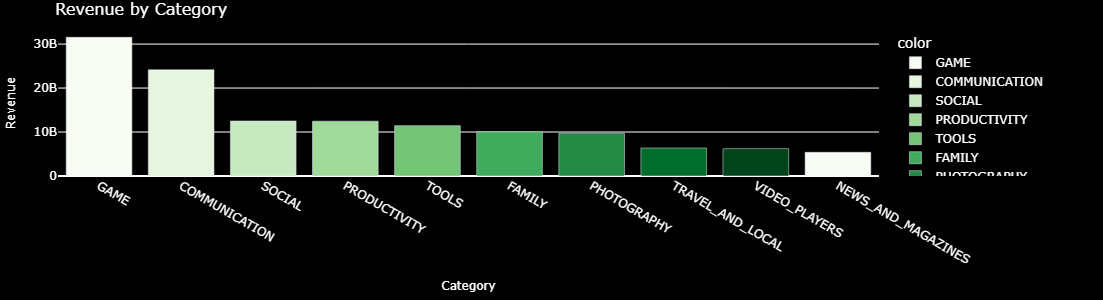

In [199]:
fig7.show()

In [200]:
import pandas as pd
import numpy as np

# Sample DataFrame (if not already created)
apps_df = pd.DataFrame({
    'Category': ['Game', 'Productivity', 'Social', 'Finance', 'Health'] * 5  # Example categories
})

# Add a 'Genres' column with example data
genres_list = [
    "Action;Adventure", "Productivity", "Social Media", "Finance;Investing", "Health & Fitness"
] * 5  # Repeating some sample genres

apps_df['Genres'] = genres_list  # Assign the list to the DataFrame

# Now execute your original code safely
genre_counts = apps_df['Genres'].str.split(';', expand=True).stack().value_counts().nlargest(10)

# Print results
print(apps_df.head())  # To verify the column exists
print(genre_counts)  # To see the top genres


       Category             Genres
0          Game   Action;Adventure
1  Productivity       Productivity
2        Social       Social Media
3       Finance  Finance;Investing
4        Health   Health & Fitness
Action              5
Adventure           5
Productivity        5
Social Media        5
Finance             5
Investing           5
Health & Fitness    5
Name: count, dtype: int64


In [201]:
# Sample DataFrame (if not already created)
apps_df = pd.DataFrame({
    'Category': ['Game', 'Productivity', 'Social', 'Finance', 'Health'] * 5
})

# Add a 'Genres' column with example data
genres_list = [
    "Action;Adventure", "Productivity", "Social Media", "Finance;Investing", "Health & Fitness"
] * 5  # Repeating some sample genres

apps_df['Genres'] = genres_list  # Assign genres

# Process the 'Genres' column
genre_counts = apps_df['Genres'].str.split(';', expand=True).stack().value_counts().nlargest(10)



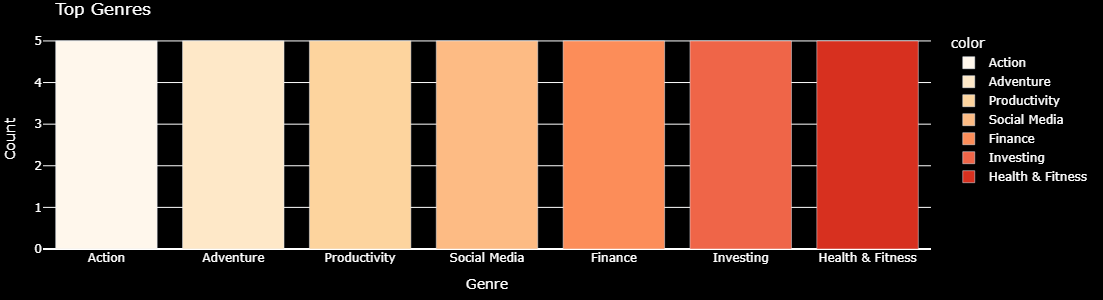

In [202]:
#figure 8
# Fix: Ensure color has the same length as x and y
fig8 = px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x': 'Genre', 'y': 'Count'},
    title='Top Genres',
    color=genre_counts.index,  # Use genre names as colors
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)

# Update layout for better visualization
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")
# Show the figure
fig8.show()

In [203]:
np.random.seed(42)  # For reproducibility
apps_df['Last Updated'] = pd.date_range(start='2023-01-01', periods=len(apps_df), freq='D')  # Sample dates
apps_df['Rating'] = np.round(np.random.uniform(1.0, 5.0, len(apps_df)), 1)  # Ratings between 1.0 and 5.0
apps_df['Type'] = np.random.choice(['Free', 'Paid'], size=len(apps_df))  # Free/Paid apps


In [204]:
#Figure 9
fig9=px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")

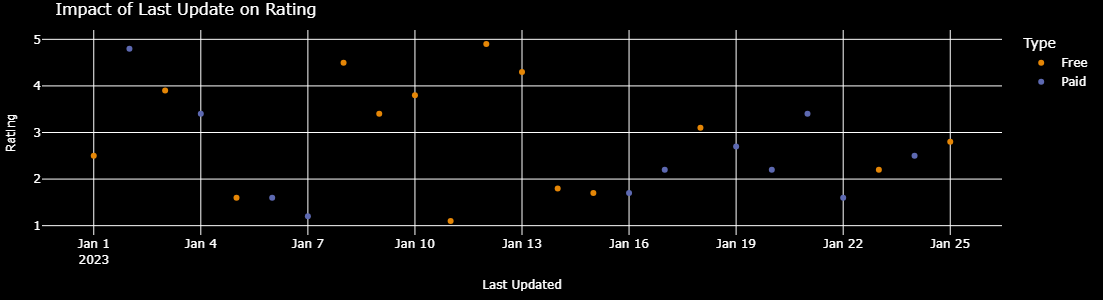

In [205]:
fig9.show()

In [206]:
#Figure 10
fig10=px.box(
    apps_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

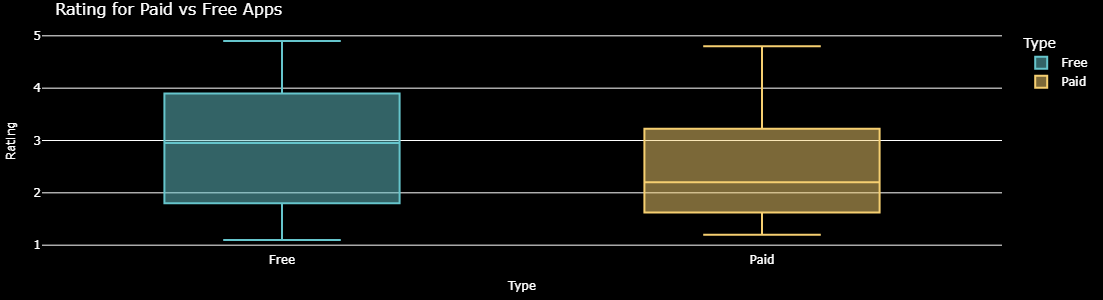

In [207]:
fig10.show()

In [208]:
plot_containers_split=plot_containers.split('</div')

In [209]:
 if len(plot_containers_split) > 1 :
     final_plot=plot_containers_split[-2]+'</div>'
 else:
    final_plot = plot_containers

In [210]:
dashboard_html ="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta chars="utf-8">
    <meta name="viewport" content="width=device-width,intial_scale-1.0">
    <title>Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial,sans-serif;
            background-color:#fff;
            color: 0;
            margin:0;
            padding:0;
            }}
            .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """

In [211]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [212]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [213]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [214]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True